<a href="https://colab.research.google.com/github/Tharunakula/Home-Assignment-3/blob/main/Q2%20Implementing%20a%20Denoising%20Autoencoder%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3701 - val_loss: 0.2236
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2110 - val_loss: 0.1827
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1788 - val_loss: 0.1639
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1617 - val_loss: 0.1521
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1507 - val_loss: 0.1447
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1448 - val_loss: 0.1398
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1400 - val_loss: 0.1361
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1365 - val_loss: 0.1336
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1340 - val_loss: 0.1320
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1330 - val_loss: 0.1303
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1305 - val_loss: 0.1290
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 

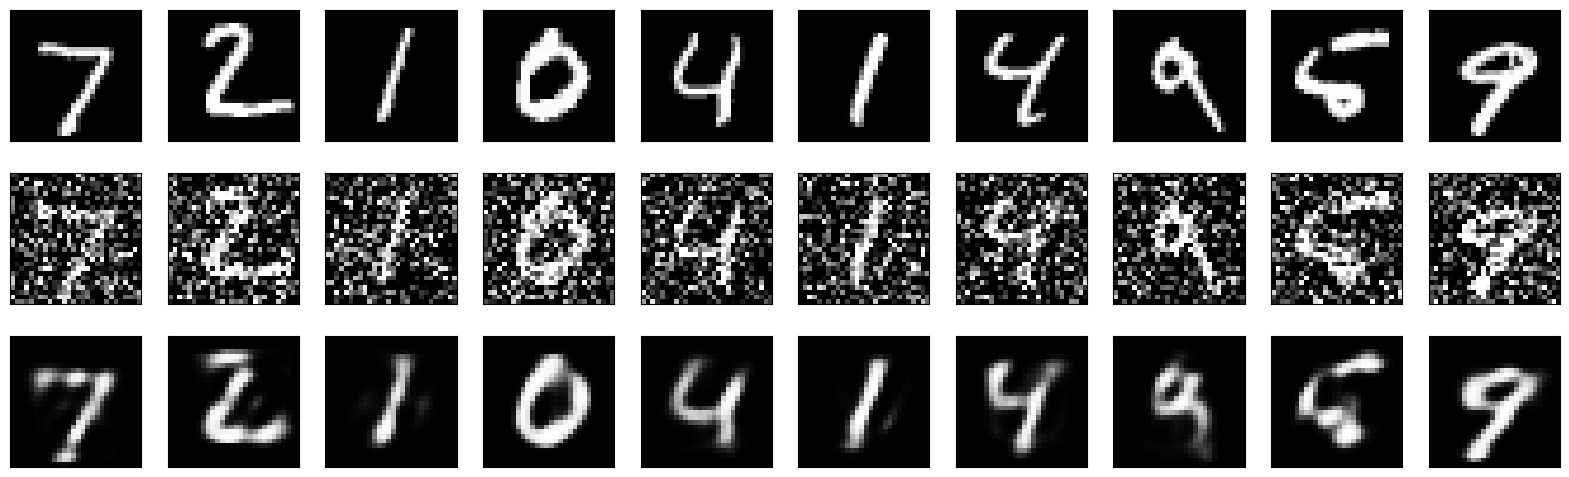

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 2. Define the denoising autoencoder
input_dim = 784
latent_dim = 32

# Encoder
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder_hidden = tf.keras.layers.Dense(latent_dim, activation='relu')(input_layer)

# Decoder
decoder_hidden = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoder_hidden)

autoencoder = tf.keras.models.Model(input_layer, decoder_hidden)

# 3. Compile and train the denoising autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,  # Train with noisy input, clean output
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Visualize noisy vs. reconstructed images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 4. Compare basic vs. denoising autoencoder (qualitative)
# The output for the basic autoencoder is already provided in the previous response.
# The denoising autoencoder, as shown in the output of this code, is able to
# reconstruct images with significantly less noise.

# 5. Real-world scenario: Medical Imaging
# Denoising autoencoders are highly beneficial in medical imaging.
# Medical images, such as MRI or CT scans, are often corrupted by noise due to
# various factors like low radiation doses, hardware limitations, or patient movement.
# Denoising autoencoders can effectively remove this noise, improving the
# image quality and making it easier for doctors to diagnose diseases.
# For example, a denoising autoencoder could be used to enhance low-dose CT scans,
# reducing the radiation exposure to patients while maintaining diagnostic accuracy.
# Another use case is the denoising of MRI images that are corrupted by motion artifacts.